In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from math import sqrt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Correlation

In [ ]:
df = pd.read_csv("Processed_data.csv",index_col=  0)
df = df.set_index("HourUTC",drop = True)

In [ ]:
Data_corr = df.drop(["year","month","day","hour"],axis='columns')
correlation_table = Data_corr.corr()

Text(0.5, 1.0, 'Correlation Heatmap of Wind Data')

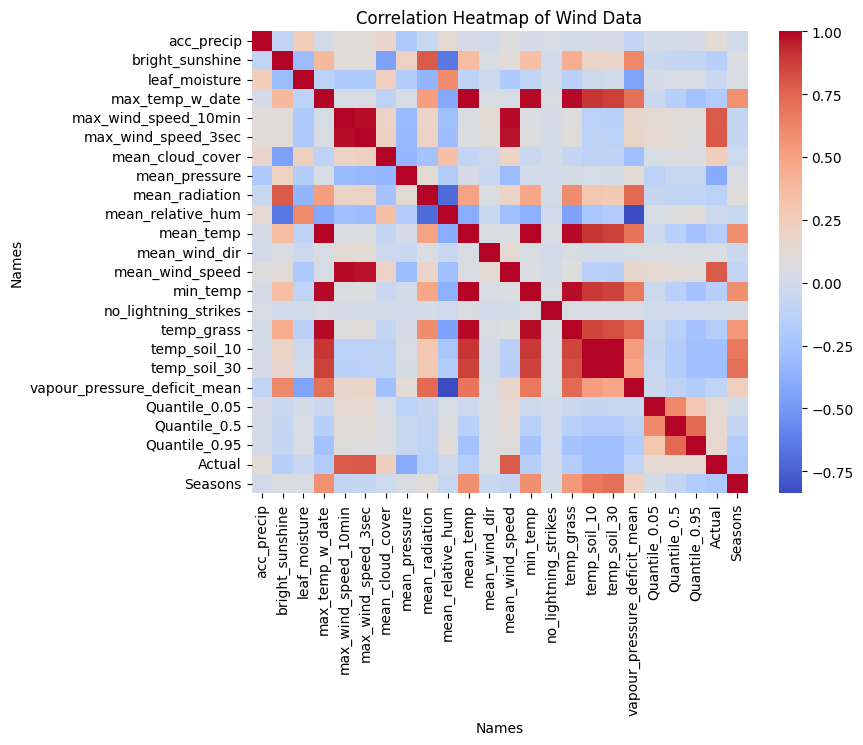

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size (adjust as needed)
sns.heatmap(correlation_table, cmap='coolwarm', fmt=".2f", annot=False)

# Add labels and title
plt.xlabel('Names')
plt.ylabel('Names')
plt.title('Correlation Heatmap of Wind Data')

# Explanations regarding the choice of features

In [ ]:
# Split data into X and y
DataX = df.drop("Actual",axis='columns')
#DataX = DataX.fillna(0)
DataY = df.Actual


lagged_df_1 = DataX.shift(periods=1,fill_value =0 ).add_suffix('_Lag1')
lagged_df_2 = DataX.shift(periods=2,fill_value =0 ).add_suffix('_Lag2')
lagged_df_3 = DataX.shift(periods=3,fill_value =0 ).add_suffix('_Lag3')
combined_DataX = pd.concat([DataX,lagged_df_1,lagged_df_2,lagged_df_3],axis=1)
combined_DataX = combined_DataX.fillna(0)

#Data split into Test and Train:
X_train, X_test, y_train, y_test = train_test_split(combined_DataX, DataY, test_size=0.25, shuffle=False)


# Feature Selector

In [ ]:
reg = LinearRegression()# Linear regression model for forward selector 

#n_feautes = auto no tol, means 
#If the score is not incremented by at least tol between 
#two consecutive feature additions or removals, stop adding or removing.

#Cv - cross validation implemented with timerseries split of 5 

sfs = SequentialFeatureSelector(reg, n_features_to_select=10,cv=TimeSeriesSplit(n_splits=5))
sfs.fit(X_train, y_train)


sfs.get_support()

X_train_transformed = sfs.transform(X_train)

In [ ]:
sel_names  = sfs.get_support()
print(sfs.get_support())
sel_fea = combined_DataX.columns[sel_names]
print(sel_fea)

[False  True False  True False  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False  True False False  True False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False False False False False False False False False False False False]
Index(['bright_sunshine', 'max_temp_w_date', 'max_wind_speed_3sec',
       'mean_pressure', 'mean_radiation_Lag1', 'mean_wind_speed_Lag1',
       'temp_grass_Lag1', 'bright_sunshine_Lag2', 'max_wind_speed_3sec_Lag3',
       'mean_pressure_Lag3'],
      dtype='object')


In [ ]:
#For regression 
new_DataX = combined_DataX[sel_fea].reset_index(drop=True)
#new_DataX.to_csv("Feature_selected.csv")


In [ ]:
new_DataX

,bright_sunshine,max_temp_w_date,max_wind_speed_3sec,mean_pressure,mean_radiation_Lag1,mean_wind_speed_Lag1,temp_grass_Lag1,bright_sunshine_Lag2,max_wind_speed_3sec_Lag3,mean_pressure_Lag3
0,0.0,0.300971,0.242321,0.434307,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.303398,0.174061,0.434307,0.000113,0.183908,0.318565,0.0,0.000000,0.000000
2,0.0,0.308252,0.197952,0.435523,0.000113,0.178161,0.320675,0.0,0.000000,0.000000
3,0.0,0.305825,0.191126,0.435523,0.000113,0.201149,0.324895,0.0,0.242321,0.434307
4,0.0,0.296117,0.208191,0.435523,0.000113,0.201149,0.314346,0.0,0.174061,0.434307
...,...,...,...,...,...,...,...,...,...,...
17512,0.0,0.487864,0.337884,0.386861,0.000000,0.178161,0.451477,0.0,0.279863,0.383212
17513,0.0,0.487864,0.313993,0.394161,0.000000,0.310345,0.472574,0.0,0.238908,0.381995
17514,0.0,0.480583,0.262799,0.402676,0.000000,0.316092,0.474684,0.0,0.290102,0.384428
17515,0.0,0.470874,0.218430,0.407543,0.000000,0.247126,0.470464,0.0,0.337884,0.386861


Text(0.5, 1.0, 'Correlation Heatmap of Feature Selected')

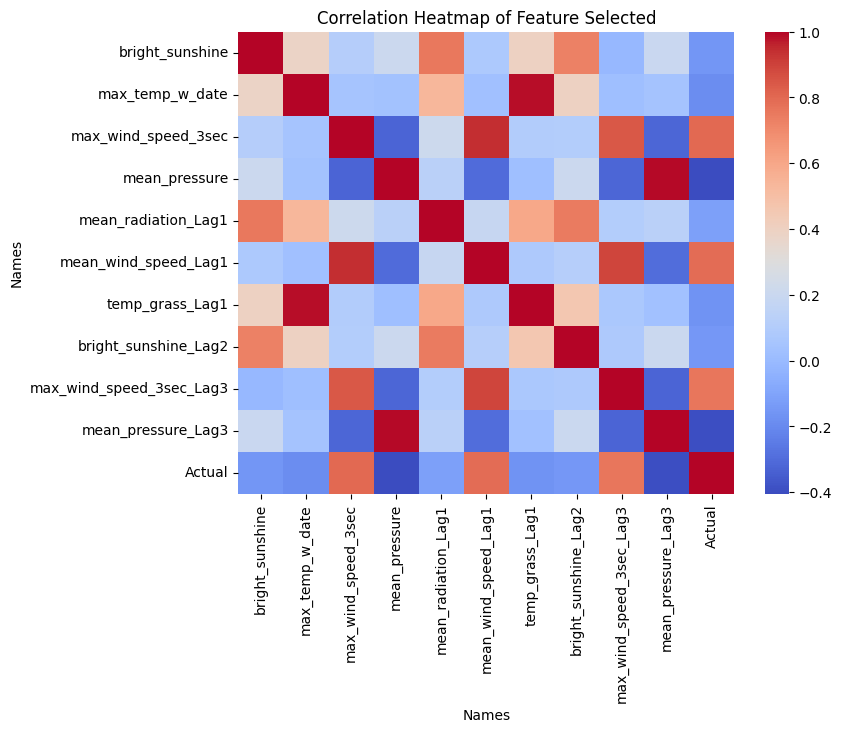

In [ ]:
test = new_DataX
test["Actual"] = df["Actual"].values
#test = pd.concat([DataY,new_DataX])
test = new_DataX
correlation_table = test.corr()
plt.figure(figsize=(8, 6))  # Set the figure size (adjust as needed)
sns.heatmap(correlation_table, cmap='coolwarm', fmt=".2f", annot=False)

# Add labels and title
plt.xlabel('Names')
plt.ylabel('Names')
plt.title('Correlation Heatmap of Feature Selected')

In [ ]:
df["Actual"].values

array([0.29018492, 0.25889047, 0.23470839, ..., 0.45376956, 0.3541963 ,
       0.3428165 ])

In [ ]:
pd.read_csv("Feature_selected.csv",index_col=0)

,bright_sunshine,max_temp_w_date,max_wind_speed_3sec,mean_pressure,mean_radiation_Lag1,mean_wind_speed_Lag1,temp_grass_Lag1,bright_sunshine_Lag2,max_wind_speed_3sec_Lag3,mean_pressure_Lag3
0,0.0,0.300971,0.242321,0.434307,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.303398,0.174061,0.434307,0.000113,0.183908,0.318565,0.0,0.000000,0.000000
2,0.0,0.308252,0.197952,0.435523,0.000113,0.178161,0.320675,0.0,0.000000,0.000000
3,0.0,0.305825,0.191126,0.435523,0.000113,0.201149,0.324895,0.0,0.242321,0.434307
4,0.0,0.296117,0.208191,0.435523,0.000113,0.201149,0.314346,0.0,0.174061,0.434307
...,...,...,...,...,...,...,...,...,...,...
17512,0.0,0.487864,0.337884,0.386861,0.000000,0.178161,0.451477,0.0,0.279863,0.383212
17513,0.0,0.487864,0.313993,0.394161,0.000000,0.310345,0.472574,0.0,0.238908,0.381995
17514,0.0,0.480583,0.262799,0.402676,0.000000,0.316092,0.474684,0.0,0.290102,0.384428
17515,0.0,0.470874,0.218430,0.407543,0.000000,0.247126,0.470464,0.0,0.337884,0.386861


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=538942fa-4593-4d1a-b90d-2d23669fe78c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>